In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.read_csv("spam.csv")

df = pd.read_csv("spam.csv", encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Steps that we will follow

1. Data Cleaning
2. EDA
3. Text preprocessing
4. Model building
5. Evaluation
6. Improvement
7. website
8. Deply

# Data Cleaning

In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df = df.drop(['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , axis=1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
# Renaming the columns
df.rename(columns={'v1' : 'target' , 'v2' : 'text'} , inplace=True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [12]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# Check for duplicate values

df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

# EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [19]:
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

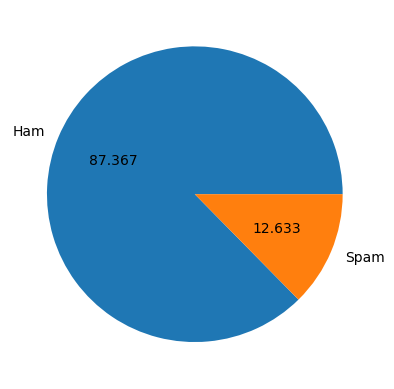

In [20]:
plt.pie(df['target'].value_counts() , labels=['Ham' , 'Spam'] , autopct='%0.3f')
plt.show()

So the data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Engr_Mujeeb
[nltk_data]     Akbar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_char'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['text'].apply(lambda x : nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [26]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [27]:
df['num_sentaces'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_char,num_words,num_sentaces
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_char' , 'num_words' , 'num_sentaces']].describe()

,num_char,num_words,num_sentaces
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df.head(1)

,target,text,num_char,num_words,num_sentaces
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [31]:
# ham
df[df['target'] == 0][['num_char' , 'num_words' , 'num_sentaces']].describe()

,num_char,num_words,num_sentaces
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# Spam
df[df['target'] == 1][['num_char' , 'num_words' , 'num_sentaces']].describe()

,num_char,num_words,num_sentaces
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

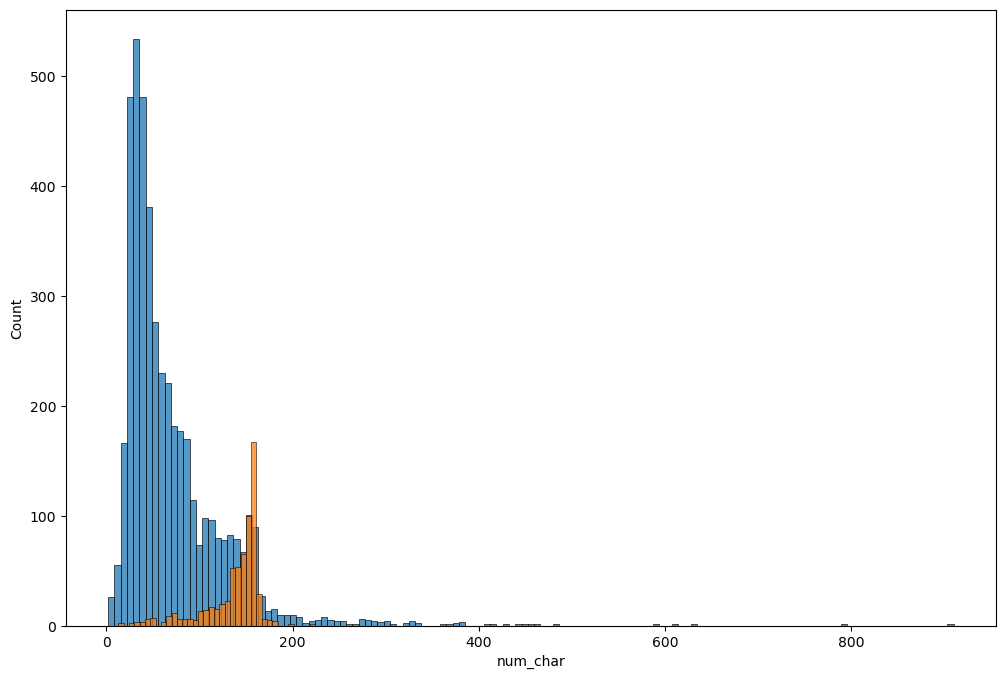

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'])

<Axes: xlabel='num_words', ylabel='Count'>

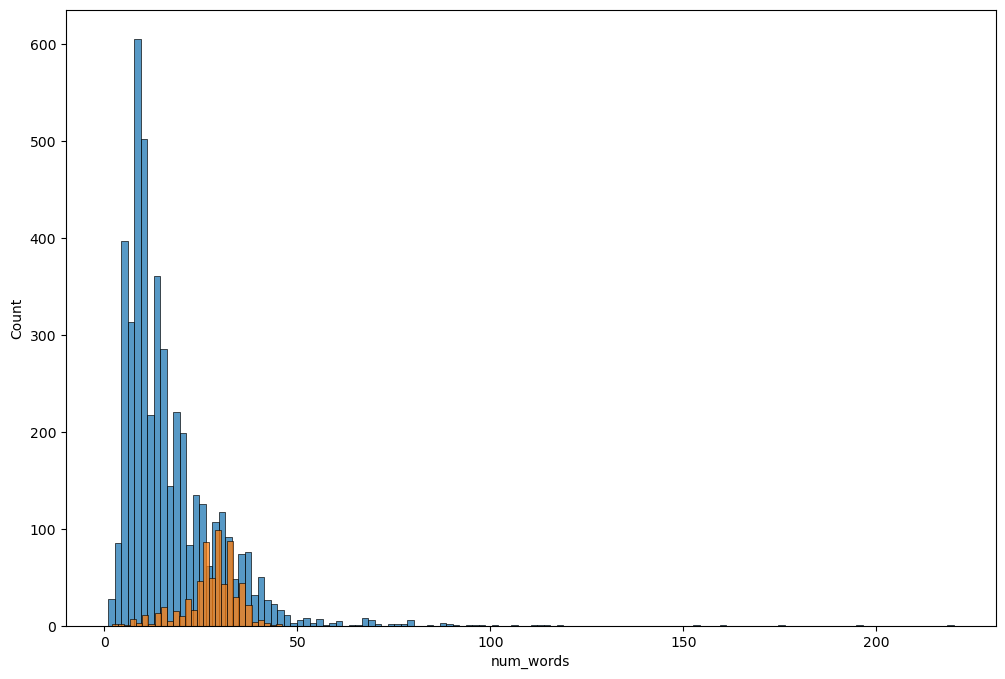

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])

C:\Users\Engr_Mujeeb Akbar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


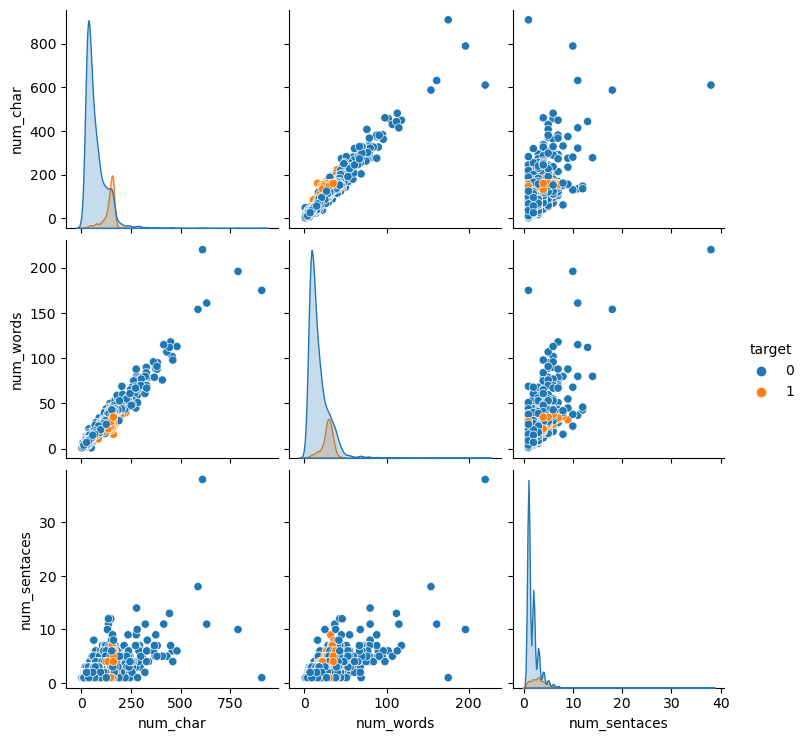

In [35]:
sns.pairplot(df , hue='target')

In [36]:
df[['num_char' , 'num_words' , 'num_sentaces']].corr()

,num_char,num_words,num_sentaces
num_char,1.000000,0.965760,0.624139
num_words,0.965760,1.000000,0.679971
num_sentaces,0.624139,0.679971,1.000000


<Axes: >

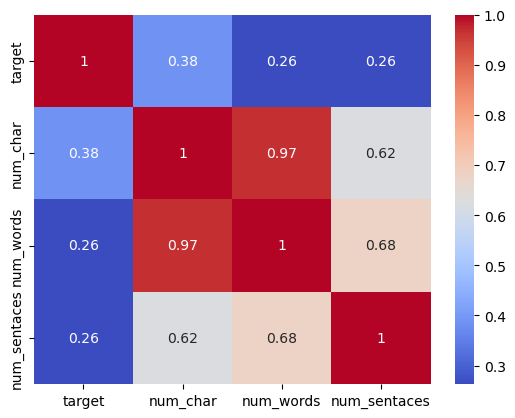

In [37]:
sns.heatmap(df[['target' , 'num_char' , 'num_words' , 'num_sentaces']].corr() , annot=True , cmap='coolwarm')

# Data Preprocessing
- lower case
- tokanization
- removing special characters
- removing stop words and punctuation
- stemming

In [38]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\Engr_Mujeeb
[nltk_data]     Akbar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [40]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [41]:
df['text'][120]

'URGENT! Your Mobile No. was awarded å£2000 Bonus Caller Prize on 5/9/03 This is our final try to contact U! Call from Landline 09064019788 BOX42WR29C, 150PPM'

In [42]:
transform('URGENT! Your Mobile No. was awarded å£2000 Bonus Caller Prize on 5/9/03 This is our final try to contact U! Call from Landline 09064019788 BOX42WR29C, 150PPM')

'urgent mobil award bonu caller prize final tri contact u call landlin 09064019788 box42wr29c 150ppm'

In [43]:
df['transform_text'] = df['text'].apply(transform)

In [44]:
df.head()

,target,text,num_char,num_words,num_sentaces,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

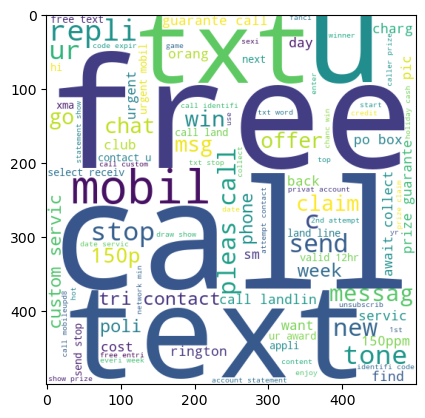

In [48]:
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

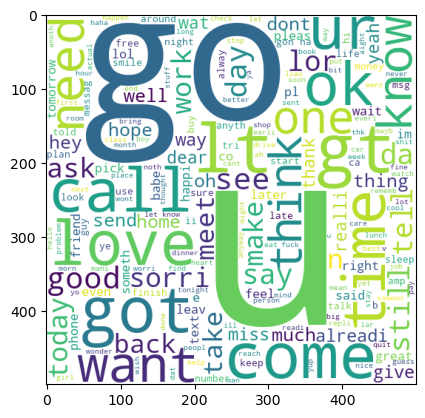

In [50]:
plt.imshow(ham_wc)

In [51]:
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

9939

In [53]:
from collections import Counter
Counter(spam_corpus).most_common(50)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30)]

In [54]:
new = pd.DataFrame(Counter(spam_corpus).most_common(30) , columns=['word' , 'frequency'])

In [55]:
new

,word,frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


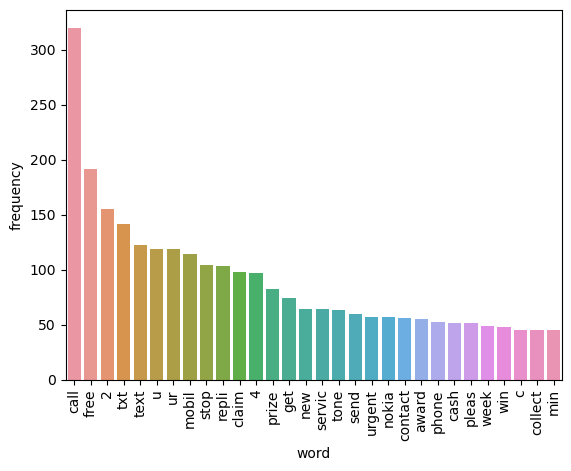

In [56]:
sns.barplot(x='word' , y='frequency' , data=new)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
# Same with ham messages

ham_corpus = []
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35404

In [59]:
Counter(ham_corpus).most_common(50)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 127),
 ('today', 123),
 ('hope', 122),
 ('ask', 121),
 ('sorri', 121),
 ('n', 120),
 ('send', 120),
 ('r', 120),
 ('work', 118),
 ('dont', 118),
 ('meet', 112),
 ('hi', 111),
 ('well', 109),
 ('thing', 109),
 ('wat', 108),
 ('k', 107),
 ('much', 107),
 ('night', 107),
 ('oh', 106)]

In [60]:
new_2 = pd.DataFrame(Counter(ham_corpus).most_common(30) , columns=['word' , 'frequency'])
new_2

,word,frequency
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


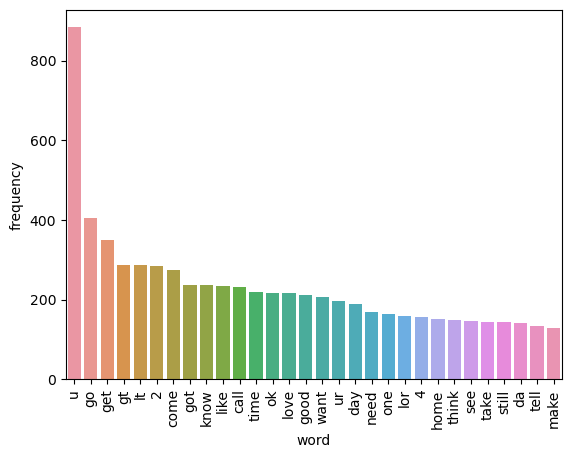

In [61]:
sns.barplot(x='word' , y='frequency' , data=new_2)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [62]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [63]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [64]:
X =  cv.fit_transform(df['transform_text']).toarray()

In [65]:
X.shape

(5169, 6708)

In [66]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [67]:
y = df['target'].values

In [68]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=2)

In [71]:
from sklearn.naive_bayes import BernoulliNB , GaussianNB , MultinomialNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [72]:
bnb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()

In [73]:
# BernoulliNB
bnb.fit(X_train , y_train)
y_pred1 = bnb.predict(X_test)

print("accuracy score" , accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print("precision score" , precision_score(y_test , y_pred1))

accuracy score 0.9700193423597679
[[893   3]
 [ 28 110]]
precision score 0.9734513274336283


In [74]:
# GaussianNB
gnb.fit(X_train , y_train)
y_pred2 = gnb.predict(X_test)

print("accuracy score" , accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print("precision score" , precision_score(y_test , y_pred2))

accuracy score 0.8800773694390716
[[792 104]
 [ 20 118]]
precision score 0.5315315315315315


In [75]:
# MultinomialNB
mnb.fit(X_train , y_train)
y_pred3 = mnb.predict(X_test)

print("accuracy score" , accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print("precision score" , precision_score(y_test , y_pred3))

accuracy score 0.9642166344294004
[[871  25]
 [ 12 126]]
precision score 0.8344370860927153


### With 2nd

In [76]:
X =  tfidf.fit_transform(df['transform_text']).toarray()

In [77]:
X.shape

(5169, 6708)

In [78]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
y = df['target'].values

In [80]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=2)

In [83]:
# BernoulliNB
bnb.fit(X_train , y_train)
y_pred1 = bnb.predict(X_test)

print("accuracy score" , accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print("precision score" , precision_score(y_test , y_pred1))

accuracy score 0.9700193423597679
[[893   3]
 [ 28 110]]
precision score 0.9734513274336283


In [84]:
# GaussianNB
gnb.fit(X_train , y_train)
y_pred2 = gnb.predict(X_test)

print("accuracy score" , accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print("precision score" , precision_score(y_test , y_pred2))

accuracy score 0.8762088974854932
[[793 103]
 [ 25 113]]
precision score 0.5231481481481481


In [85]:
# MultinomialNB
mnb.fit(X_train , y_train)
y_pred3 = mnb.predict(X_test)

print("accuracy score" , accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print("precision score" , precision_score(y_test , y_pred3))

accuracy score 0.9593810444874274
[[896   0]
 [ 42  96]]
precision score 1.0


tfidf  --> MNB    - We selected this one

### Now other models

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [87]:
lr = LogisticRegression(solver='liblinear' , penalty='l1')
svc = SVC(kernel='sigmoid' , gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50 , random_state=2)
adaboost = AdaBoostClassifier(n_estimators=50 , random_state=2)
bag = BaggingClassifier(n_estimators=50 , random_state=2)
etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50 , random_state=2)
xgb = XGBClassifier(n_estimators=50 , random_state=2)

In [88]:
clfs = {
    'LR' : lr,
    'SVC' : svc,
    'MNB' : mnb,
    'DTC' : dtc,
    'KNC' : knc,
    'RFC' : rfc,
    'Adaboost' : adaboost,
    'Bag' : bag,
    'ETC' : etc,
    'GBC' : gbc,
    'XGB' : xgb,
}

In [89]:
def train(clf , X_train , X_test , y_train , y_test):
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)
    
    return accuracy , precision

In [90]:
train(svc , X_train , X_test , y_train , y_test)

(0.9729206963249516, 0.9741379310344828)

In [91]:
accuracy_scores = []
precision_scores = []

for name , clf in clfs.items():
    current_accuracy , current_precision = train(clf , X_train , X_test , y_train , y_test)

    
    print("For" , name)
    print("Accuracy" , current_accuracy)
    print("Precision" , current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For LR
Accuracy 0.9516441005802708
Precision 0.94
For SVC
Accuracy 0.9729206963249516
Precision 0.9741379310344828
For MNB
Accuracy 0.9593810444874274
Precision 1.0
For DTC
Accuracy 0.9381044487427466
Precision 0.8627450980392157
For KNC
Accuracy 0.9003868471953579
Precision 1.0
For RFC
Accuracy 0.971953578336557
Precision 1.0
For Adaboost
Accuracy 0.9245647969052224
Precision 0.8409090909090909
For Bag
Accuracy 0.9584139264990329
Precision 0.8625954198473282
For ETC
Accuracy 0.9729206963249516
Precision 0.9824561403508771
For GBC
Accuracy 0.9526112185686654
Precision 0.9238095238095239
For XGB
Accuracy 0.9729206963249516
Precision 0.9435483870967742


In [92]:
performance = pd.DataFrame({'Algorithm' : clfs.keys() , 'Accuracy': accuracy_scores , 'Precision' : precision_scores}).sort_values('Precision' , ascending=False)

In [93]:
performance

,Algorithm,Accuracy,Precision
2,MNB,0.959381,1.000000
4,KNC,0.900387,1.000000
5,RFC,0.971954,1.000000
8,ETC,0.972921,0.982456
1,SVC,0.972921,0.974138
10,XGB,0.972921,0.943548
0,LR,0.951644,0.940000
9,GBC,0.952611,0.923810
3,DTC,0.938104,0.862745
7,Bag,0.958414,0.862595


In [94]:
# Voting classifier

MNB = MultinomialNB()
RFC = RandomForestClassifier(n_estimators=50 , random_state=2)
ETC = ExtraTreesClassifier(n_estimators=50 , random_state=2)
KNC = KNeighborsClassifier()

In [95]:
from sklearn.ensemble import VotingClassifier

In [96]:
voting = VotingClassifier(estimators=[('MNB' , MNB) , ('RF' , RFC) , ('ETC' , ETC) , ('KNN' , KNC)])

In [97]:
voting.fit(X_train , y_train)

VotingClassifier(estimators=[('MNB', MultinomialNB()),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('KNN', KNeighborsClassifier())])

In [98]:
y_predict = voting.predict(X_test)

print("Accuracy" , accuracy_score(y_test , y_predict))
print("Precision" , precision_score(y_test , y_predict))

Accuracy 0.9564796905222437
Precision 1.0


- Now we will save it in pkl format

In [ ]:
df.to_csv('modified_dataset.csv', index=False)

In [100]:
import pickle

In [102]:
pickle.dump(tfidf , open('vectorizer_2.pkl' , 'wb'))
pickle.dump(rfc , open('model_2.pkl' , 'wb'))

## Now we will make a frontend for this with streamlit in VS Code